In [7]:
import os
import h2o
from h2o.automl import H2OAutoML

In [8]:
os.chdir('..')

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_51"; Java(TM) SE Runtime Environment (build 1.8.0_51-b16); Java HotSpot(TM) 64-Bit Server VM (build 25.51-b03, mixed mode)
  Starting server from /Users/37138/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/ff/0003j6g13lzcpwj4j090w7v9sr000f/T/tmphdwgtxi0
  JVM stdout: /var/folders/ff/0003j6g13lzcpwj4j090w7v9sr000f/T/tmphdwgtxi0/h2o_jpf_started_from_python.out
  JVM stderr: /var/folders/ff/0003j6g13lzcpwj4j090w7v9sr000f/T/tmphdwgtxi0/h2o_jpf_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Asia/Dubai
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.11
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_jpf_3uzrs9
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [22]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file('ENG_DATA/SELECTED/12-8_test.csv')
test = h2o.import_file('ENG_DATA/SELECTED/12-8_train.csv')
factor_columns = ['full_address',
 'street_name',
 'type',
 'neighborhood']

#remove column index 
train.columns.remove("C1")
test.columns.remove("C1")

# Identify predictors and response
x = train.columns
y = "sale_price"
x.remove(y)
x.remove("C1")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [23]:
for f in factor_columns: 
    train[f] = train[f].asfactor()
    test[f] = test[f].asfactor()

In [24]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20191209_190625,3.44759e+11,587162,3.44759e+11,238006,0.207269
StackedEnsemble_AllModels_AutoML_20191209_190625,3.48333e+11,590198,3.48333e+11,239730,0.208356
XGBoost_1_AutoML_20191209_190625,3.51993e+11,593290,3.51993e+11,238027,0.209808
XGBoost_2_AutoML_20191209_190625,3.58749e+11,598956,3.58749e+11,240627,0.20972
XGBoost_grid_1_AutoML_20191209_190625_model_1,3.63377e+11,602807,3.63377e+11,254855,0.226783
GBM_1_AutoML_20191209_190625,3.73138e+11,610850,3.73138e+11,243268,0.21043
XGBoost_3_AutoML_20191209_190625,3.73526e+11,611168,3.73526e+11,253452,0.222857
GBM_4_AutoML_20191209_190625,3.76123e+11,613289,3.76123e+11,249345,nan
GBM_grid_1_AutoML_20191209_190625_model_1,3.83052e+11,618912,3.83052e+11,255106,nan
GBM_2_AutoML_20191209_190625,3.87522e+11,622512,3.87522e+11,250824,nan


In [25]:
aml.training_info

{'creation_epoch': '1575903986',
 'start_epoch': '1575903986',
 'stop_epoch': '1575906172',
 'duration_secs': '2186'}

In [38]:
aml.download_mojo(path='Models/h20-leader-12-8.mojo')

'/Users/37138/cs/capstone/Models/h20-leader-12-8.mojo'

In [76]:
help(aml.leaderboard)

Help on H2OFrame in module h2o.frame object:

class H2OFrame(h2o.base.Keyed)
 |  Primary data store for H2O.
 |  
 |  H2OFrame is similar to pandas' ``DataFrame``, or R's ``data.frame``. One of the critical distinction is that the
 |  data is generally not held in memory, instead it is located on a (possibly remote) H2O cluster, and thus
 |  ``H2OFrame`` represents a mere handle to that data.
 |  
 |  Create a new H2OFrame object, possibly from some other object.
 |  
 |  :param python_obj: object that will be converted to an ``H2OFrame``. This could have multiple types:
 |  
 |      - None: create an empty H2OFrame
 |      - A list/tuple of strings or numbers: create a single-column H2OFrame containing the contents of this list.
 |      - A dictionary of ``{name: list}`` pairs: create an H2OFrame with multiple columns, each column having the
 |        provided ``name`` and contents from ``list``. If the source dictionary is not an OrderedDict, then the
 |        columns in the H2OFram

In [51]:
type(aml.leader)

h2o.estimators.stackedensemble.H2OStackedEnsembleEstimator

In [29]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=5)  # Print all rows instead of default (10 rows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20191209_190625,3.44759e+11,587162,3.44759e+11,238006,0.207269
StackedEnsemble_AllModels_AutoML_20191209_190625,3.48333e+11,590198,3.48333e+11,239730,0.208356
XGBoost_1_AutoML_20191209_190625,3.51993e+11,593290,3.51993e+11,238027,0.209808
XGBoost_2_AutoML_20191209_190625,3.58749e+11,598956,3.58749e+11,240627,0.20972
XGBoost_grid_1_AutoML_20191209_190625_model_1,3.63377e+11,602807,3.63377e+11,254855,0.226783


In [63]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_AutoML_20191209_190625

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 40815719974.638336
RMSE: 202029.007755417
MAE: 119174.56159422651
RMSLE: 0.12476680410156232
R^2: 0.9770619847505104
Mean Residual Deviance: 40815719974.638336
Null degrees of freedom: 4743
Residual degrees of freedom: 4741
Null deviance: 8441435470926064.0
Residual deviance: 193629775559684.25
AIC: 129377.87720803896

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 344758889958.4855
RMSE: 587161.7238533908
MAE: 238005.73887882475
RMSLE: 0.2072693384327509
R^2: 0.8062490461964487
Mean Residual Deviance: 344758889958.4855
Null degrees of freedom: 4743
Residual degrees of freedom: 4741
Null deviance: 8443320813057156.0
Residual deviance: 1635536173963055.0
AIC: 139500.5200510587


In [65]:
preds = aml.leader.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [72]:
preds['sale_price'] = test['sale_price']

In [75]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score

In [79]:
df_pred = preds.as_data_frame()

In [80]:
df_pred

,predict,sale_price
0,2.563650e+05,205000
1,4.546924e+05,320000
2,1.227214e+06,1150000
3,1.533906e+06,1340000
4,1.771082e+06,1716888
...,...,...
18971,1.125617e+06,1300000
18972,1.437002e+06,1270000
18973,7.295322e+05,550000
18974,1.113083e+06,1275000


In [82]:
r2_score(df_pred["predict"], df_pred["sale_price"])

0.7987570747782388

In [83]:
df_pred["pct_err"] = ((df_pred["predict"] - df_pred["sale_price"]) / df_pred["sale_price"]) *100

In [86]:
df_pred["pct_err"].describe()

count    18976.000000
mean         3.457304
std         23.772193
min        -78.638227
25%        -10.991909
50%         -0.446553
75%         13.018827
max        430.266773
Name: pct_err, dtype: float64

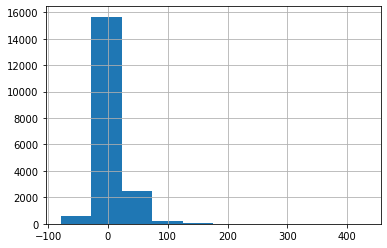

In [89]:
df_pred["pct_err"].hist()

In [90]:
df_pred.to_csv("ENG_DATA/PREDICTED/12-8_df_h20_leader_predictions.csv")